In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calculate_area(file_path):
        
    image = cv2.imread(file_path)
#     # 获取轮廓点集
#     contour = contours[-1]

#     # 提取横坐标
#     x_coordinates = contour[:, 0, 0]

#     # 获取最左和最右坐标
#     leftmost_x = np.min(x_coordinates)
#     rightmost_x = np.max(x_coordinates)
#     airfoil_width = rightmost_x-leftmost_x
    
#     # 找到最上方和最下方的点
#     bottommost_point = tuple(contour[contour[:, :, 1].argmin()][0])
#     topmost_point = tuple(contour[contour[:, :, 1].argmax()][0])
#     airfoil_height = topmost_point[1]-bottommost_point[1]
#     print("leftmost_x,rightmost_x,bottommost_point,topmost_point:",leftmost_x,rightmost_x,bottommost_point,topmost_point)
# #     image_crop=image4[:,:rightmost_x]
#     image_crop=image4
#     # 获取图像的高度和宽度
#     height, width = image4.shape[:2]
# ,leftmost_x,topmost_point[1],airfoil_width,airfoil_height, width,height
    above_mask = draw_above_mask(image,file_path)
    image_crop=image[:,:above_mask.shape[0]]
#     above_mask = above_mask[:,:rightmost_x]
    # 将图像转换为HSV颜色空间
    hsv = cv2.cvtColor(image_crop, cv2.COLOR_BGR2HSV)

    # 定义深蓝色范围
    lower_dark_blue = np.array([110, 50, 50])  # 深蓝色下限
    upper_dark_blue = np.array([130, 255, 255])  # 深蓝色上限

    # 创建深蓝色掩码
    dark_blue_mask = cv2.inRange(hsv, lower_dark_blue, upper_dark_blue)
    
    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(dark_blue_mask)

    # 显示图形
    plt.show()
    
    print("above_mask.shape, dark_blue_mask.shape",above_mask.shape, dark_blue_mask.shape)
    # 与深蓝色区域的掩膜进行按位与操作，获取线上方的深蓝色区域
    blue_area_above_line = cv2.bitwise_and(above_mask, dark_blue_mask)
    
    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(blue_area_above_line)

    # 显示图形
    plt.show()

    # 计算非零像素数量
    blue_area = cv2.countNonZero(dark_blue_mask)

    return blue_area

In [52]:
import numpy as np

def draw_above_mask(image,path):
    
    filename = path.split("/")[-1].split(".")[0]
    case_number = filename.split("-")[0]
    
    print("filename",filename)
    # 读取.dat文件，跳过前65行，从第66行开始读取数据
    data = pd.read_csv("/kaggle/input/airfoil-geo/"+case_number+".dat", header=None, delimiter='\s+', skiprows=65, nrows=25)
    airfoil_coor=data.values
    
    
    scale = [[1190/3,1190/3] for _ in range(len(airfoil_coor))]

    airfoil_coor = [[int(x * y ) for x, y in zip(sub_a, sub_b)] for sub_a, sub_b in zip(airfoil_coor, scale)]
    
    # 创建一个与画布相同大小的掩膜图像
    line_mask1 = np.zeros_like(image[:, :, 2])

    # 将线的坐标数据绘制在掩膜图像上
    cv2.polylines(line_mask1, [np.array(airfoil_coor)], False, 255, thickness=2)
    
    line_mask1 = cv2.flip(line_mask1, 0)
        
    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(line_mask1)

    # 显示图形
    plt.show()
    
    airfoil_coor = [[x + 436, y + 472] for x, y in airfoil_coor]
    
    # 创建一个与画布相同大小的掩膜图像
    line_mask2 = np.zeros_like(image[:, :, 2])

    # 将线的坐标数据绘制在掩膜图像上
    cv2.polylines(line_mask2, [np.array(airfoil_coor)], False, 255, thickness=2)
    
#     line_mask2 = cv2.flip(line_mask2, 0)
        
    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(line_mask2)

    # 显示图形
    plt.show()
    
    # 假设你有一条线的坐标点组成的数组 line_points

    # 找到线的最左边的点
    leftmost_point = min(airfoil_coor, key=lambda point: point[0])

    # 计算对称线的 y 坐标
    y_left = leftmost_point[1]
    symmetric_line = [[point[0], 2 * y_left - point[1]] for point in airfoil_coor]
    print("symmetric_line",symmetric_line)
    
    # 创建一个与画布相同大小的掩膜图像
    line_mask3 = np.zeros_like(image[:, :, 2])
    cv2.polylines(line_mask3, [np.array(symmetric_line)], False, 255, thickness=2)

    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(line_mask3)

    # 显示图形
    plt.show()

    symmetric_line.append([symmetric_line[-1][0],0])
    symmetric_line.append([symmetric_line[0][0],0])

    # 创建一个与画布相同大小的掩膜图像
    line_mask = np.zeros_like(image[:, :, 2])

    # 将线的坐标数据绘制在掩膜图像上
    cv2.fillPoly(line_mask, [np.array(symmetric_line)], 255)
        
    print("line_mask.shape",line_mask.shape)

    print("airfoil_coor",airfoil_coor)
    
    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(line_mask)

    # 显示图形
    plt.show()
    
    print("int((data.values[0][0]+1)*1190/3)+44",int((data.values[0][0]+1)*1190/3)+44)
    print("data.values[0][0]",data.values[0][0])
    
    line_mask = line_mask[:,:int((data.values[0][0]+1)*1190/3)+44]

    return line_mask

height, width: 879 1278


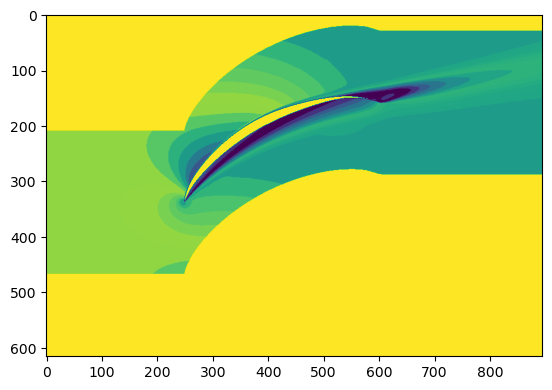

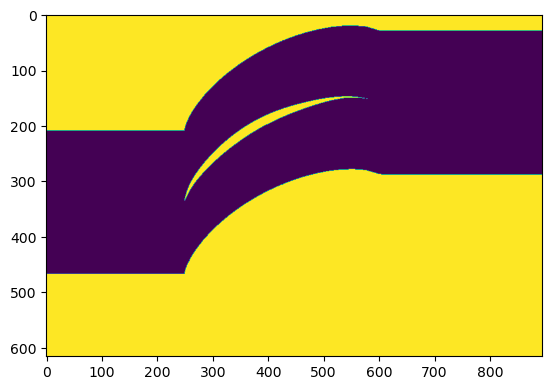

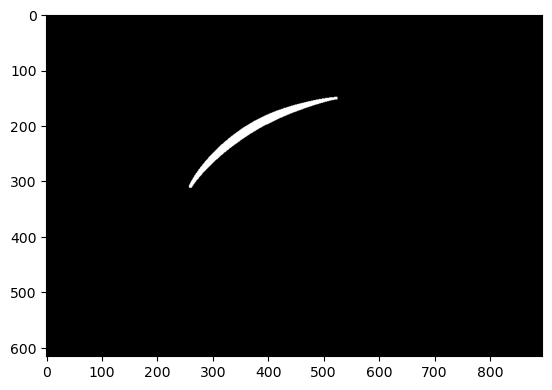

机翼最左下坐标：(258, 312)
leftmost_x,rightmost_x,bottommost_point,topmost_point: 257 525 (521, 148) (258, 312)
filename case411-175
x0,y0 257 312


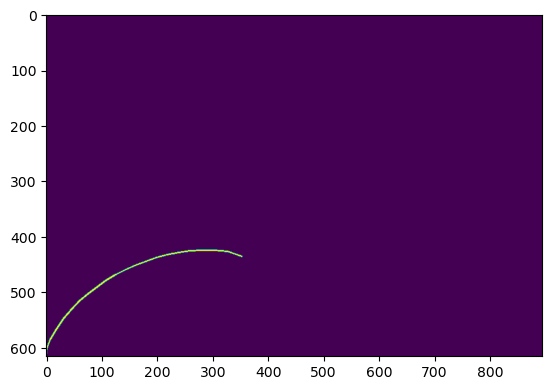

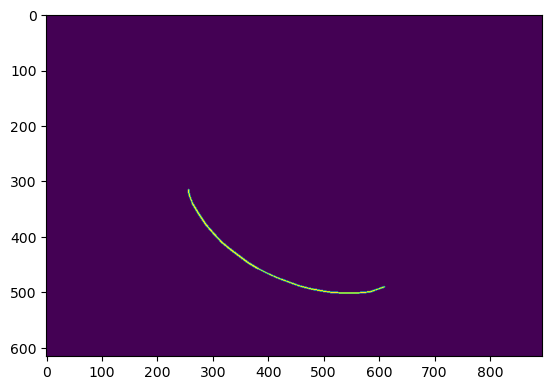

symmetric_line [[610, 151], [584, 142], [560, 140], [538, 140], [516, 141], [496, 144], [475, 148], [456, 153], [437, 160], [418, 167], [400, 175], [382, 184], [365, 194], [349, 206], [333, 218], [317, 231], [303, 246], [289, 262], [276, 281], [270, 291], [264, 301], [259, 314], [257, 321], [257, 324], [257, 326]]


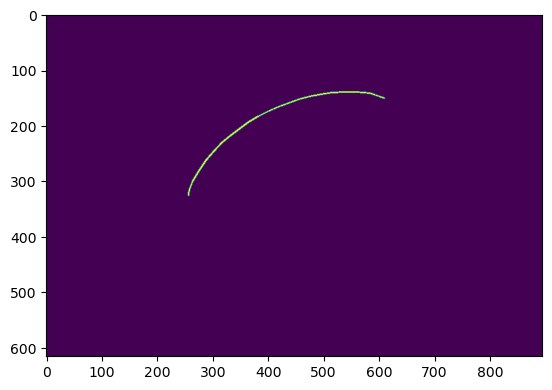

line_mask.shape (616, 895)
airfoil_coor [[610, 491], [584, 500], [560, 502], [538, 502], [516, 501], [496, 498], [475, 494], [456, 489], [437, 482], [418, 475], [400, 467], [382, 458], [365, 448], [349, 436], [333, 424], [317, 411], [303, 396], [289, 380], [276, 361], [270, 351], [264, 341], [259, 328], [257, 321], [257, 318], [257, 316]]


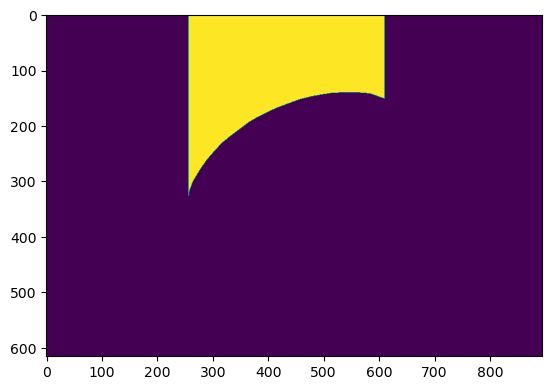

int((data.values[0][0]+1)*1190/3)+44 794
data.values[0][0] 0.8912140315563264


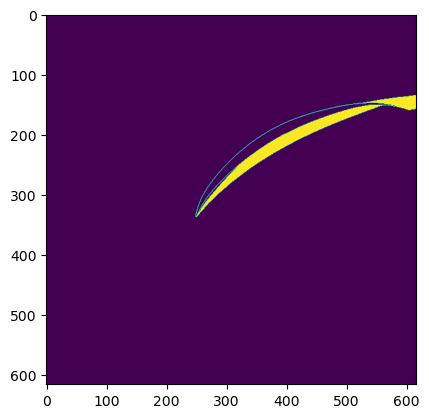

above_mask.shape, dark_blue_mask.shape (616, 794) (616, 616)


error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


In [53]:
# capture_airfoil("/kaggle/input/flowfieldpic/Pic/case411-175.png")

calculate_area("/kaggle/input/flowfieldpic/Pic/case411-175.png")

In [ ]:
import os
import glob

# 指定文件夹路径
pic_path = glob.glob("/kaggle/input/flowfieldpic/Pic/*")

df = pd.DataFrame(columns=["图片名", '失速面积','失速开始位置'])

# 遍历文件夹中的所有文件
for file_path in pic_path:
    area=capture_airfoil(file_path)
    # 迭代添加行数据
    data = {'图片名': file_name,
            '失速面积': area,
           '失速开始位置':start_coor}
    df.loc[len(df)] = data
    # 保存到Excel文件
    df.to_excel('分类结果.xlsx', index=False)
    

In [40]:
def capture_airfoil(file_path):

    image = cv2.imread(file_path)
    # 获取图像的高度和宽度
    height, width = image.shape[:2]
    print("height, width:",height, width)

    # 计算要保留的像素范围
    top_h=int(0.15*height)
    bottom_h=int(0.85*height)

    top_w=int(0.15*width)
    bottom_w=int(0.85*width)

    # 截取图像的上部分
    image = image[top_h:bottom_h, top_w:bottom_w]
    height, width = image.shape[:2]

    # 将图像转换为灰度图像
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(gray)

    # 显示图形
    plt.show()

    # 对灰度图像进行阈值处理
    _, threshold = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
    
    # 创建一个新的图形
    plt.figure()

    # 将图像显示在图形中
    plt.imshow(threshold)

    # 显示图形
    plt.show()
    
    # 进行膨胀和腐蚀操作，消除噪声
    kernel = np.ones((5, 5), np.uint8)
    threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
    
    # 连通组件分析
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(threshold)

    # 获取每个区域掩膜的单独最大和最小纵坐标
    for i in range(1, num_labels):  # 跳过背景区域（标签0）
        min_y = stats[i, 1]
        max_y = stats[i, 1] + stats[i, 3]
        if(min_y > 0 and max_y < height):
            region_mask = np.uint8(labels == i) * 255  # 创建区域掩膜
            region_image = cv2.bitwise_and(image, image, mask=region_mask)  # 通过按位与操作提取区域图像    
            # 创建一个新的图形
            plt.figure()

            # 将图像显示在图形中
            plt.imshow(region_image)

            # 显示图形
            plt.show()
            
            gray_mask = cv2.cvtColor(region_image, cv2.COLOR_BGR2GRAY)
            
            # 获取非零像素坐标
            non_zero_pixels = cv2.findNonZero(gray_mask)

            # 获取最左边和最下边的坐标
            left_x = np.min(non_zero_pixels[:,:,0])
            bottom_y = np.max(non_zero_pixels[:,:,1])

            print("机翼最左下坐标：({}, {})".format(left_x, bottom_y))

    # 使用Canny边缘检测
    edges = cv2.Canny(region_image, 100, 200)

    # 寻找最外侧的轮廓
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return calculate_area(contours,image,file_path)